## Подготовка данных

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif', "serif":"stix",  'size': 26})
rc('text', usetex=True)
import matplotlib.pyplot as plt

In [3]:
from data_loading import *
import glob

In [4]:
# import tensorflow as tf
# gpu_fraction = 0.5
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [10]:
key = lambda x : x.split("/")[-1]
s = [print(x) for x in sorted(glob.glob("../results/cnn/*/*2[0,1,2]*_all_runs**"), key = None)]

../results/cnn/2019-05-25-01-01/cnn_model_20_all_runs_p1_ecoli_100000_10000_06_00_cds_False.pyob
../results/cnn/2019-05-25-03-56/cnn_model_20_all_runs_p1_ecoli_100000_10000_12_00_cds_False.pyob
../results/cnn/2019-05-25-09-21/cnn_model_20_all_runs_p1_ecoli_100000_10000_24_00_cds_False.pyob
../results/cnn/2019-05-25-11-54/cnn_model_20_all_runs_p1_ecoli_100000_10000_50_00_cds_False.pyob
../results/cnn/2019-05-25-16-09/cnn_model_21_all_runs_p1_ecoli_100000_10000_12_00_cds_False.pyob
../results/cnn/2019-05-25-18-33/cnn_model_22_all_runs_p1_ecoli_100000_10000_12_00_cds_False.pyob
../results/cnn/2019-05-26-19-14/cnn_model_21_all_runs_p1_ecoli_100000_10000_50_00_cds_False.pyob
../results/cnn/2019-05-27-19-48/cnn_model_21_all_runs_p1_ecoli_100000_10000_coding_24_00.pyob
../results/cnn/2019-05-27-22-09/cnn_model_21_all_runs_p1_ecoli_100000_10000_24_00.pyob
../results/cnn/2019-05-28-02-59/cnn_model_21_all_runs_p1_ecoli_100000_10000_coding_51_00.pyob
../results/cnn/2019-05-28-03-46/cnn_model_21_a

# Контексты со всех сторон

In [217]:
from data_loading import *
import glob

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'serif', "serif":"stix",  'size': 26})
rc('text', usetex=True)

def list_files(string):
    a = sorted(glob.glob(string), key = lambda x : x.split("/")[-1])
#     [print(x) for x in a]
    return a
# "../results/dnn/*/*all_runs**"

def boxplot(*args):
    test_list = []
    for arg in args:
        test_list += [test_accs(x) for x in list_files(arg)]
    [print(len(x), end = " ") for x in test_list]
    plt.boxplot(test_list,
            medianprops=dict(color="black", linewidth = 2),
            boxprops=dict(linewidth = 2),
            capprops=dict(linewidth = 2),
            whiskerprops=dict(linewidth = 2))
    return test_list

In [218]:
list_files("../results/cnn/*/*21_all_runs_p1*100000*12*.*")

['../results/cnn/2019-06-01-13-46/cnn_model_21_all_runs_p1_ecoli_100000_10000_12_00_2.pyob',
 '../results/cnn/2019-06-02-14-34/cnn_model_21_all_runs_p1_ecoli_100000_10000_12_00_2.pyob',
 '../results/cnn/2019-05-25-16-09/cnn_model_21_all_runs_p1_ecoli_100000_10000_12_00_cds_False.pyob']

file ../results/cnn/2019-06-01-13-46/cnn_model_21_all_runs_p1_ecoli_100000_10000_12_00_2.pyob
file ../results/cnn/2019-06-02-14-34/cnn_model_21_all_runs_p1_ecoli_100000_10000_12_00_2.pyob
file ../results/cnn/2019-05-25-16-09/cnn_model_21_all_runs_p1_ecoli_100000_10000_12_00_cds_False.pyob
30 30 30 

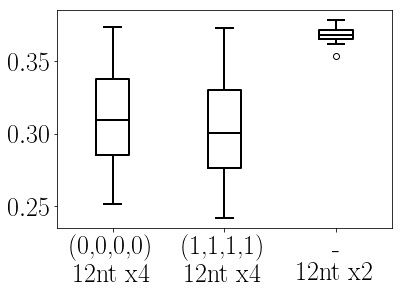

In [227]:
test_list = boxplot("../results/cnn/*/*21_all_runs_p1*100000*12*.*")
plt.xticks(range(1,4), ("(0,0,0,0)\n 12nt x4", "(1,1,1,1)\n 12nt x4", "- \n 12nt x2"))
plt.show()

Ни замена предсказываемой позиции на (0,0,0,0) ни на (1,1,1,1) не делает точность выше -- только ниже (

# Автоэнкодер

In [42]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, Input, concatenate
from keras import backend as K
from keras.models import Model

Using TensorFlow backend.


In [43]:
x0 = Input(shape=(length,4))
x1 = Conv1D(16, (4), activation='relu', padding='same')(x0)
x1 = MaxPooling1D((2), padding='same')(x1) # x1 (64, 64, 16)

# x2 = Conv2D(8, (4, 4), activation='relu', padding='same')(x1)
# x2 = MaxPooling2D((2, 2), padding='same')(x2) # x2 (32, 32, 8)

# # x3 = Conv2D(8, (4, 4), activation='relu', padding='same')(x2)
# # x3 = MaxPooling2D((2, 2), padding='same')(x3) #x3 (16, 16, 8)

# # # at this point the representation is (4, 4, 8) i.e. 128-dimensional


# # x97 = Conv2D(8, (3, 3), activation='relu', padding='same')(x3)
# # x97 = UpSampling2D((2, 2))(x97) #x97 (32, 32, 8)

# x98 = Conv2D(8, (3, 3), activation='relu', padding='same')(concatenate([x97, x2]))
# x98 = UpSampling2D((2, 2))(x98) # x98 (64, 64, 8)

# x99 = Conv1D(16, (3), activation='relu', padding = "same")(concatenate([x98, x1]))
x99 = Conv1D(16, (3), activation='relu', padding = "same")(x1)
x99 = UpSampling1D((2))(x99) #x99 (128, 128, 16)

decoded = Conv1D(4, (3), activation='softmax', padding='same')(x99)


model = Model(x0, decoded)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

NameError: name 'length' is not defined

In [ ]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=1)
    history = model.fit(data.train1, data.train_ans, epochs=100, callbacks = [es], validation_data=(data.validate1, data.validate_ans))

# Смотрим фильтры

In [179]:
list_files("../results/cnn/*/*21_all_runs_p1*100000*12*.*")

['../results/cnn/2019-06-01-13-46/cnn_model_21_all_runs_p1_ecoli_100000_10000_12_00_2.pyob',
 '../results/cnn/2019-06-02-14-34/cnn_model_21_all_runs_p1_ecoli_100000_10000_12_00_2.pyob',
 '../results/cnn/2019-05-25-16-09/cnn_model_21_all_runs_p1_ecoli_100000_10000_12_00_cds_False.pyob']

In [180]:
import glob
path = "../results/cnn/2019-05-25-16-09/"
glob.glob(path + "/*all_runs*")

['../results/cnn/2019-05-25-16-09/cnn_model_21_all_runs_p1_ecoli_100000_10000_12_00_cds_False.pyob']

In [20]:
data_g = generate_data("../results/ecoli_100000_10000", 12, 0)
data = next(data_g)

0 

In [ ]:
from keras.models import model_from_json
json_file = open(path+ '/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [21]:
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(path + "/0.weights")
print("Loaded model from disk")

Using TensorFlow backend.


Loaded model from disk


In [23]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loaded_model.evaluate([data.test1, data.test3], data.test_ans)

10000/10000 [==============================] - 5s 497us/step


[1.314675722503662, 0.3721]

In [26]:
# loaded_model.summary()

In [184]:
bases_list = ["A", "T", "C", "G"]

In [185]:
def letter(array):
    ind = np.argsort(-array)
    l = [bases_list[i] for i in ind]
#     print(ind, array)
    if array[ind[0]] - array[ind[1]] > 0.00001:
        return l[0]
    else:
        return "[" + l[0] + l[1] + "]"

def letters(array):
    a = ""
    for i in range(array.shape[0]):
        a += letter(array[i, ...])
    return a

In [186]:
filters = {}
for i in range(30):
    print(i, end = " ")
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(path + "/" + str(i)+ ".weights")
    for j in range(2, 4):
        layer = loaded_model.layers[j].get_weights()
        for k in range(12):
            f = letters(layer[0][ ..., k])
            if f not in filters:
                filters[f] = 0
            filters[f] += 1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [198]:
# sorted(filters.items(), key = lambda x: x[1], reverse = True)

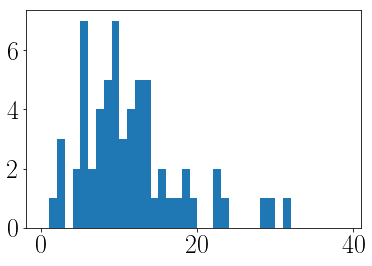

In [189]:
plt.hist(filters.values(), bins = range(40))
plt.show()

In [190]:
loaded_model.layers[2].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1,),
 'filters': 12,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3,),
 'name': 'conv1d_1',
 'padding': 'valid',
 'strides': (1,),
 'trainable': True,
 'use_bias': True}

In [192]:
loaded_model.layers[2].get_weights()

[array([[[-0.13377085,  0.01273788,  0.12904076, -0.42858672,
          -0.2528986 ,  0.15651877, -0.02066732,  0.01209036,
          -0.15213999,  0.00555322, -0.11940747, -0.36739913],
         [-0.2285325 , -0.21942338,  0.06651375, -0.23633762,
          -0.36627614, -0.12861617,  0.09840048,  0.05397404,
          -0.06512573,  0.19574727, -0.2350348 ,  0.16495712],
         [ 0.19814578, -0.11457587, -0.19417518,  0.05283832,
          -0.05975753, -0.15935943, -0.40370315, -0.04607344,
          -0.05498779,  0.03801094,  0.0727724 ,  0.11699101],
         [ 0.27094477, -0.10266501,  0.08189829, -0.32719606,
           0.26641828, -0.14761016, -0.1255378 , -0.3062754 ,
          -0.12189608,  0.20243102,  0.25472263, -0.41787678]],
 
        [[-0.05276087,  0.1931867 , -0.06257947, -0.36722028,
           0.02535531,  0.3096686 , -0.26398543, -0.01566134,
           0.14412984,  0.047472  , -0.19755079,  0.21345638],
         [-0.0947608 ,  0.26267952, -0.1811902 , -0.40067706,


In [199]:
x = hot_encode_seq("AAAAAAAAAAAA").reshape(1, 12, 4)

In [200]:
x.shape

(1, 12, 4)

In [202]:
prediction = loaded_model.predict([x, x])

In [211]:
(prediction)

0.0686977

# Один большой контекст

In [4]:
from data_loading import *
from cnn_models import *

Using TensorFlow backend.


In [46]:
data_g = generate_data("../results/ecoli_1000000_100000_uniform", enviroment_size=50)
data = next(data_g)

0 

In [9]:
model = create_cnn_model_21()

In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 10, 4)        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 10, 4)        0                                            
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 8, 12)        156         input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 8, 12)        156         input_6[0][0]                    
__________________________________________________________________________________________________
concatenat

In [41]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv1D, concatenate, Flatten, Dense
import keras

def create_input_model_1(input_size = 101):
    model = Sequential()
    model.add(Conv1D(24, kernel_size=6, activation='relu', input_shape=(input_size,4)))
    return model

def create_output_model_1(input_size = 101):
    half1 = create_input_model_1()
    half2 = create_input_model_1()
    x = keras.layers.concatenate([half1.output, half2.output])
    x = Flatten()(x)
    x = Dense(4, activation='relu')(x)
    x = Dense(4, activation='softmax')(x)
    model = Model([half1.input, half2.input], x)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [42]:
model = create_output_model_1()

In [43]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_22_input (InputLayer)    (None, 101, 4)       0                                            
__________________________________________________________________________________________________
conv1d_23_input (InputLayer)    (None, 101, 4)       0                                            
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 96, 24)       600         conv1d_22_input[0][0]            
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, 96, 24)       600         conv1d_23_input[0][0]            
__________________________________________________________________________________________________
concatenat

In [44]:
train    = [data.trainf,    data.trainr]
test     = [data.testf,     data.testr]
validate = [data.validatef, data.validater]

In [45]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=1)
history = model.fit(train, data.train_ans, epochs=100, callbacks = [es], validation_data=(validate, data.validate_ans)) 

Train on 100000 samples, validate on 10000 samples
Epoch 1/100
100000/100000 [==============================] - 53s 530us/step - loss: 1.3863 - acc: 0.2568 - val_loss: 1.3863 - val_acc: 0.2455
Epoch 2/100
100000/100000 [==============================] - 51s 507us/step - loss: 1.3862 - acc: 0.2573 - val_loss: 1.3865 - val_acc: 0.2455
Epoch 00002: early stopping
